# Fisher Matrix for Weak Lensing Observable

The next code is the **draft final code** and must be optimized (specifically to change the functions for each type of cosmology). 

In each cosmology I print the Fisher Matrix and the errors for each parameter considered (there are errors with the same order than in the article, but the diference still be important).

In [444]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import inspect
import pandas as pd

# For interpolation
from scipy.interpolate import RectBivariateSpline, interp2d

import warnings

# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*divmax.*")

import logging
# Basic registry settings
logging.basicConfig(level=logging.INFO)

## Cosmological constants


In [445]:
# First model
Omega_b0= 0.05
omega_b0= 0.022445
Omega_m0 = 0.32
omega_m0 = 0.143648
h = 0.67
n_s = 0.96
sigma_8 = 0.816
Omega_DE0 = 0.68
w_0 = -1
w_a = 0
gamma = 0.55
Omega_K0 = 1 - (Omega_DE0 + Omega_m0) # FLAT universe!

#[params_cosmo]
#sigma8 = 0.815584
#h = 0.670
#omega_cdm      = 0.2685628338348412
#omega_lambda   = 0.68
#pivot_scalar              = 0.05
#pivot_tensor              = 0.05
#scalar_amp(1)             = 2.12605e-09
#scalar_spectral_index(1)  = 0.96
#Omega_b = 0.05
#Omega_m = 0.32
#Omega_nu = 0.00143717
#n_s = 0.96
#A_s = 2.12605e-09

# Euclid specifications
sigma_epsilon  = 0.3
n_g = 30 #arcmin^-2. Surface density of galaxies
A_survey = 15000 #deg^2
N_z= 10 #number of redshift bins
ng_i = n_g/N_z # Surface density of galaxies per bin

## Import the data set

In [446]:
# Matter power spectrum
P = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/Pnonlin-zk.txt'
P_deltas = pd.read_csv(P, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

P_array_2d = P_deltas.values
P_list = P_deltas.values.flatten().tolist()
P_array_1d = np.array(P_list) # DONT USE

# Redshift
red = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/z_values_list.txt'
z = pd.read_csv(red, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

z_list = z.values.flatten().tolist()
z_array = np.array(z_list)

# k values
kas = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/k_values_list.txt'
k = pd.read_csv(kas, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

k_list = k.values.flatten().tolist()
k_array = np.array(k_list)

# D values

D = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/fiducial_eps_0/D_Growth-zk.txt'
D_deltas = pd.read_csv(D, header=None, delimiter=' ')  # Cambia ' ' por el delimitador correcto

D_array_2d = D_deltas.values

## Fiducial values

In [447]:
Omega_c0 = 0.2685628338348412

Omega_nu0 = 0.00143717

Omega_b0 = 0.05

Omega_m0 = Omega_c0 + Omega_nu0 + Omega_b0

Omega_DE0 = 0.68 #Omega_lambda = (1-Omega_m0)

w0= -1

wa = 0

Omega_K0 = 1 - (Omega_m0 + Omega_DE0)

h = 0.67

c = 299792

sigma8 = 0.816

ns = 0.96

gamma = 6/11

In [448]:
gamma

0.5454545454545454

### Numerical Derivatives

In [449]:
## Derivada con respecto a ns y sigma8

# Matter power spectrum_plus_ns
P_pl_ns_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_ns = pd.read_csv(P_pl_ns_data, header=None, delimiter=' ')  

P_pl_ns = P_deltas_pl_ns.values

# Matter power spectrum_minor_ns
P_mn_ns_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/ns_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_ns = pd.read_csv(P_mn_ns_data, header=None, delimiter=' ')  

P_mn_ns = P_deltas_mn_ns.values

# Matter power spectrum_plus_sigma8
P_pl_sig_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_sig = pd.read_csv(P_pl_sig_data, header=None, delimiter=' ')  

P_pl_sig = P_deltas_pl_sig.values

# Matter power spectrum_minor_sigma8
P_mn_sig_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/s8_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_sig = pd.read_csv(P_mn_sig_data, header=None, delimiter=' ')  

P_mn_sig = P_deltas_mn_sig.values

# Matter power spectrum_plus_Omega_b
P_pl_Omb_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Ob_pl_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_pl_Omb = pd.read_csv(P_pl_Omb_data, header=None, delimiter=' ')  

P_pl_Omb = P_deltas_pl_Omb.values

# Matter power spectrum_minor_Omega_b
P_mn_Omb_data = 'c:/Users/MICROSOSFT/Documents/Investigacion 1/Ob_mn_eps_1p0E-2/Pnonlin-zk.txt'
P_deltas_mn_Omb = pd.read_csv(P_mn_Omb_data, header=None, delimiter=' ')  

P_mn_Omb = P_deltas_mn_Omb.values

In [450]:
# Derivadas numericas

der_P_ns = (P_pl_ns - P_mn_ns)/(2*0.01*ns)

der_P_sigma8 = (P_pl_sig - P_mn_sig)/(2*0.01*sigma8)

der_P_Omb = (P_pl_Omb - P_mn_Omb)/(2*0.01*Omega_b0)

In [451]:
interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)

In [452]:
interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)

In [453]:
interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)

In [454]:
ks = np.log10(np.logspace(np.log10(3.6*10**(-5)), np.log10(50), 710))

In [455]:
interp_func_Omb(0.001, ks, grid= False).shape

(710,)

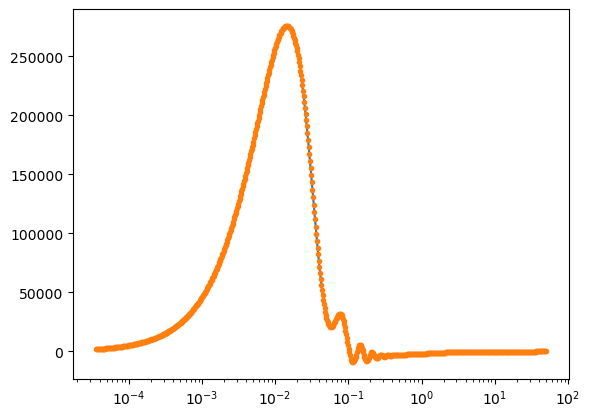

In [456]:
plt.plot(k_array, der_P_Omb[0, :])
plt.plot(10**ks, interp_func_Omb(0, ks, grid = False), '.')
plt.xscale('log')  

## For comparison

In [457]:
def comparison(created, expected):
    return 100*np.abs(1 - (created/expected))

# $\Lambda CDM$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_8$

**Considerations**

1. Adding intrinsic aligment (for now F =1)

        a. L?

In [458]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 0
        radicando = (Omega_m0) * (1 + z)**3 + (1 - Omega_m0)
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 20)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = 100 * h
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            integrand = n_array * (1 - ((r_true / c / H_0) / (r_array / c / H_0))) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [459]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 0
        radicando = (Omega_m0) * (1 + z)**3 + (1-Omega_m0)
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Oomega_m0 =  (Omega_c0 + Omega_nu0 + Omega_b0) 
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = (((2*Oomega_m0) - Omega_m0)  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)

    interp_func = RectBivariateSpline(z_array, np.log10(k_array), np.log10(P_array_2d))
    interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)
    interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)
    interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)

    def PK(self, z, k):
        return 10**(self.interp_func(z, np.log10(k), grid=False))

    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.PK(z, k))
        return P
    
    def der_PK_ns(self, z, k):
        return self.interp_func_ns(z, np.log10(k), grid=False)

    def der_PPS_ns(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_ns(z, k))
        return P

    def der_PK_sig(self, z, k):
        return self.interp_func_sig(z, np.log10(k), grid=False)

    def der_PPS_sig(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_sig(z, k))
        return P
    
    def der_PK_Omb(self, z, k):
        return self.interp_func_Omb(z, np.log10(k), grid=False)

    def der_PPS_Omb(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_Omb(z, k))
        return P
    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        c = 299792
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_ns(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia): 
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_sig(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega_b(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1+epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1-epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_m0)

    def Der_C_h(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h + epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h -epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*h)

    def Der_C_Omega_DE(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_DE0)

    def Der_C_w0(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1+epsilon), wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1-epsilon), wa, ns, sigma8, gamma, Aia, Cia)

        A = (C_plus - C_minus)/(epsilon*2*w0)

        return A

    def Der_C_wa(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2)
    
    def Der_C_gamma(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1+epsilon), Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1-epsilon), Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*gamma)
    
    def Der_C_Aia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1+epsilon), Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1-epsilon), Cia)

        return (C_plus - C_minus)/(epsilon*2*Aia)

    def Der_C_Cia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1+epsilon))
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1-epsilon))

        return (C_plus - C_minus)/(epsilon*2*Cia)

    ##
        
    def Gran_Derivative(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro1):
        if parametro1 == 'Om_m':
            return self.Der_C_Omega(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_b':
            return self.Der_C_Omega_b(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'h':
            return self.Der_C_h(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_DE':
            return self.Der_C_Omega_DE(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'w0':
            return self.Der_C_w0(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'wa':
            return self.Der_C_wa(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'ns':
            return self.Der_C_ns(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'sigma8':
            return self.Der_C_sig(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'gamma':
            return self.Der_C_gamma(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Aia':
            return self.Der_C_Aia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Cia':
            return self.Der_C_Cia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

In [460]:
class Fisher:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num+2, self.num+2))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 10)}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Cia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_m')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_b')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')
                dC_dq_Cia_matrix[i, j] = dC_dq_Cia_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Cia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)
        dC_dq_Cia_matrix = np.array(dC_dq_Cia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        dC_dq_Cia_matrix_2d = np.squeeze(dC_dq_Cia_matrix)
        
        for i, l in enumerate(L_array):

            L_parameter = ((2*(10**(l)) + 1)/2)
            C_inv = np.linalg.inv(C_matrix_2d[:, :, i])

            # OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_m_Cia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            h_Cia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_b_Cia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            ns_Cia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            sig_Cia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            Aia_Cia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # Cia
            Cia_Cia = np.trace(dC_dq_Cia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)     
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_ns, (0, 4): Om_m_sig, (0, 5): Om_m_Aia, (0, 6): Om_m_Cia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_ns, (1, 4): h_sig, (1, 5): h_Aia, (1, 6): h_Cia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_ns, (2, 4): Om_b_sig, (2, 5): Om_b_Aia, (2, 6): Om_b_Cia,
                    (3, 3): ns_ns, (3, 4): ns_sig, (3, 5): ns_Aia, (3, 6): ns_Cia,
                    (4, 4): sig_sig, (4, 5): sig_Aia, (4, 6): sig_Cia, 
                    (5, 5): Aia_Aia, (5, 6): Aia_Cia, 
                    (6, 6): Cia_Cia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return f_sky*Fisher

In [461]:
Aia, Cia = 1.72, 0.0134

In [462]:
params = {'num_params': 5}

A = Fisher(params) 

In [463]:
F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

In [464]:
F

array([[ 2.02625312e+06,  4.96606708e+06,  3.19638026e+05,
        -1.90351405e+05,  1.10192331e+06,  4.50175884e+05,
         5.77837702e+07],
       [ 4.96606708e+06,  1.25509271e+07,  9.37597116e+05,
        -5.17504585e+05,  2.73787037e+06,  1.13765608e+06,
         1.46027497e+08],
       [ 3.19638026e+05,  9.37597116e+05,  9.02771326e+05,
        -1.42186454e+05,  1.61578310e+05,  7.10809229e+04,
         9.12381996e+06],
       [-1.90351405e+05, -5.17504585e+05, -1.42186454e+05,
         8.46796552e+04, -6.02483431e+04, -4.37971124e+04,
        -5.62171891e+06],
       [ 1.10192331e+06,  2.73787037e+06,  1.61578310e+05,
        -6.02483431e+04,  6.48242195e+05,  2.49974000e+05,
         3.20862150e+07],
       [ 4.50175884e+05,  1.13765608e+06,  7.10809229e+04,
        -4.37971124e+04,  2.49974000e+05,  1.03930975e+05,
         1.33403938e+07],
       [ 5.77837702e+07,  1.46027497e+08,  9.12381996e+06,
        -5.62171891e+06,  3.20862150e+07,  1.33403938e+07,
         1.7123490

In [465]:
Cov = np.linalg.inv(F)

print(Cov)

[[ 2.49631713e-05 -1.37636210e-06  4.43196714e-06  3.82269831e-05
  -4.59157105e-05  4.89098421e-05 -1.43796516e-07]
 [-1.37636210e-06  3.50279538e-05  1.39406370e-06  6.55401082e-05
  -6.32150973e-05 -2.05957864e-04  5.61265315e-08]
 [ 4.43196714e-06  1.39406370e-06  3.43891859e-06  2.15326108e-05
  -2.18229854e-05  4.40547917e-05 -1.50369134e-07]
 [ 3.82269831e-05  6.55401082e-05  2.15326108e-05  2.85029693e-04
  -2.86921297e-04  7.18292698e-05 -1.24137773e-06]
 [-4.59157105e-05 -6.32150973e-05 -2.18229854e-05 -2.86921297e-04
   3.13007461e-04 -1.51776714e-04  1.43193905e-06]
 [ 4.89097375e-05 -2.05957844e-04  4.40547730e-05  7.18291299e-05
  -1.51776539e-04 -4.46681643e+05  3.47996165e+03]
 [-1.43795660e-07  5.61263042e-08 -1.50368999e-07 -1.24137684e-06
   1.43193790e-06  3.47996165e+03 -2.71113292e+01]]


In [466]:
print('ERRORES')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error ns: ' + str(np.sqrt(Cov[3, 3])))
print('Error sigma8: ' + str(np.sqrt(Cov[4, 4])))
print('Error Aia: ' + str(np.sqrt(Cov[5, 5])))
print('Error Cia: ' + str(np.sqrt(Cov[6, 6])))

print(' ')

# Relative errors

print('RELATIVE ERRORS')

err_Om_m = np.sqrt(Cov[0, 0]) / Omega_m0
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_ns = np.sqrt(Cov[3, 3]) / ns
err_sig = np.sqrt(Cov[4, 4]) / sigma8
err_A = np.sqrt(Cov[5, 5]) / Aia
err_C = np.sqrt(Cov[6, 6]) / Cia

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))
print('Error Relativo A: ' + str(err_A))
print('Error Relativo C: ' + str(err_C))

print(' ')

print('COMPARACION')
## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.018
S_h = 0.21
S_Om_b = 0.47
S_ns = 0.035
S_sig = 0.0087

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))

ERRORES
Error Omega_m: 0.00499631577648698
Error h: 0.0059184418411131106
Error Omega_b: 0.0018544321473651882
Error ns: 0.016882822414598944
Error sigma8: 0.01769201686599191
Error Aia: nan
Error Cia: nan
 
RELATIVE ERRORS
Error Relativo Omega_m: 0.015613486614411684
Error Relativo h: 0.008833495285243449
Error Relativo Omega_b: 0.03708864294730376
Error Relativo ns: 0.017586273348540567
Error Relativo sigma8: 0.021681393218127343
Error Relativo A: nan
Error Relativo C: nan
 
COMPARACION
Comparison for Omega_m: 13.25840769771286
Comparison for h: 95.7935736736936
Comparison for Omega_b: 92.10879937291409
Comparison for ns: 49.753504718455524
Comparison for sigma8: 149.21141630031428


C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2507402351.py:8: RuntimeWarning: invalid value encountered in sqrt
  print('Error Aia: ' + str(np.sqrt(Cov[5, 5])))
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2507402351.py:9: RuntimeWarning: invalid value encountered in sqrt
  print('Error Cia: ' + str(np.sqrt(Cov[6, 6])))
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2507402351.py:22: RuntimeWarning: invalid value encountered in sqrt
  err_A = np.sqrt(Cov[5, 5]) / Aia
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2507402351.py:23: RuntimeWarning: invalid value encountered in sqrt
  err_C = np.sqrt(Cov[6, 6]) / Cia


# $\Lambda CDM$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_8$

In [467]:
class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + Omega_DE0 + Omega_k0*(1+z)**2
        return np.sqrt(radicando)
    
    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 20)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = 100 * h
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            integrand = n_array * (1 - ((r_true / c / H_0) / (r_array / c / H_0))) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [468]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + Omega_DE0 + Omega_k0*(1+z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Oomega_m0 =  (Omega_c0 + Omega_nu0 + Omega_b0) 
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = (((2*Oomega_m0) - Omega_m0)  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)

    interp_func = RectBivariateSpline(z_array, np.log10(k_array), np.log10(P_array_2d))
    interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)
    interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)
    interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)

    def PK(self, z, k):
        return 10**(self.interp_func(z, np.log10(k), grid=False))

    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.PK(z, k))
        return P
    
    def der_PK_ns(self, z, k):
        return self.interp_func_ns(z, np.log10(k), grid=False)

    def der_PPS_ns(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_ns(z, k))
        return P

    def der_PK_sig(self, z, k):
        return self.interp_func_sig(z, np.log10(k), grid=False)

    def der_PPS_sig(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_sig(z, k))
        return P
    
    
    def der_PK_Omb(self, z, k):
        return self.interp_func_Omb(z, np.log10(k), grid=False)

    def der_PPS_Omb(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        P = float(self.der_PK_Omb(z, k))
        return P
    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        c = 299792
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_ns(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia): 
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_sig(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega_b(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1+epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1-epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_m0)

    def Der_C_h(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h + epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h -epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*h)

    def Der_C_Omega_DE(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_DE0)

    def Der_C_w0(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1+epsilon), wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1-epsilon), wa, ns, sigma8, gamma, Aia, Cia)

        A = (C_plus - C_minus)/(epsilon*2*w0)

        return A

    def Der_C_wa(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2)
    
    def Der_C_gamma(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1+epsilon), Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1-epsilon), Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*gamma)
    
    def Der_C_Aia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1+epsilon), Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1-epsilon), Cia)

        return (C_plus - C_minus)/(epsilon*2*Aia)

    def Der_C_Cia(self, i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1+epsilon))
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1-epsilon))

        return (C_plus - C_minus)/(epsilon*2*Cia)

    ##
        
    def Gran_Derivative(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro1):
        if parametro1 == 'Om_m':
            return self.Der_C_Omega(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_b':
            return self.Der_C_Omega_b(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'h':
            return self.Der_C_h(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_DE':
            return self.Der_C_Omega_DE(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'w0':
            return self.Der_C_w0(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'wa':
            return self.Der_C_wa(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'ns':
            return self.Der_C_ns(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'sigma8':
            return self.Der_C_sig(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'gamma':
            return self.Der_C_gamma(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Aia':
            return self.Der_C_Aia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Cia':
            return self.Der_C_Cia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

In [469]:
class Fisher2:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num+2, self.num+2))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 10)}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_DE_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Cia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_m')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_b')
                dC_dq_Om_DE_matrix[i, j] = dC_dq_Om_DE_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_DE')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')
                dC_dq_Cia_matrix[i, j] = dC_dq_Cia_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Cia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
        dC_dq_Om_DE_matrix = np.array(dC_dq_Om_DE_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)
        dC_dq_Cia_matrix = np.array(dC_dq_Cia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
        dC_dq_Om_DE_matrix_2d = np.squeeze(dC_dq_Om_DE_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        dC_dq_Cia_matrix_2d = np.squeeze(dC_dq_Cia_matrix)
        
        for i, l in enumerate(L_array):

            L_parameter = ((2*(10**(l)) + 1)/2)
            C_inv = np.linalg.inv(C_matrix_2d[:, :, i])

            # OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_DE = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_m_Cia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            h_Om_DE = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            h_Cia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_b_Om_DE = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_b_Cia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            #OMEGA_DE
            Om_DE_Om_DE = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_DE_ns = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_DE_sig = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_DE_Aia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_DE_Cia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            ns_Cia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            sig_Cia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            Aia_Cia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # Cia
            Cia_Cia = np.trace(dC_dq_Cia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)     
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_Om_DE, (0, 4): Om_m_ns, (0, 5): Om_m_sig, (0, 6): Om_m_Aia, (0, 7): Om_m_Cia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_Om_DE, (1, 4): h_ns, (1, 5): h_sig, (1, 6): h_Aia, (1, 7): h_Cia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_Om_DE, (2, 4): Om_b_ns, (2, 5): Om_b_sig, (2, 6): Om_b_Aia, (2, 7): Om_b_Cia,
                    (3, 3): Om_DE_Om_DE, (3, 4): Om_DE_ns, (3, 5): Om_DE_sig, (3, 6): Om_DE_Aia, (3, 7): Om_DE_Cia,
                    (4, 4): ns_ns, (4, 5): ns_sig, (4, 6): ns_Aia, (4, 7): ns_Cia,
                    (5, 5): sig_sig, (5, 6): sig_Aia, (5, 7): sig_Cia, 
                    (6, 6): Aia_Aia, (6, 7): Aia_Cia, 
                    (7, 7): Cia_Cia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return f_sky*Fisher

In [470]:
params = {'num_params': 6}

A = Fisher2(params)

In [471]:
Aia, Cia = 1.72, 0.0134

In [472]:
# Time: 4.4 min

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

In [473]:
F

array([[ 1.83089346e+06,  4.73011807e+06,  2.88647825e+05,
        -9.39479517e+04, -1.77598063e+05,  1.05147710e+06,
         4.29845135e+05,  5.51741516e+07],
       [ 4.73011807e+06,  1.25509271e+07,  9.37597118e+05,
        -2.35927486e+05, -5.17504585e+05,  2.73787037e+06,
         1.13765608e+06,  1.46027497e+08],
       [ 2.88647825e+05,  9.37597118e+05,  9.02771326e+05,
        -3.09889538e+04, -1.42186454e+05,  1.61578310e+05,
         7.10809231e+04,  9.12381999e+06],
       [-9.39479517e+04, -2.35927486e+05, -3.09889538e+04,
         7.44725641e+03,  1.27525608e+04, -5.04412772e+04,
        -2.03286898e+04, -2.60935421e+06],
       [-1.77598063e+05, -5.17504585e+05, -1.42186454e+05,
         1.27525608e+04,  8.46796553e+04, -6.02483433e+04,
        -4.37971125e+04, -5.62171892e+06],
       [ 1.05147710e+06,  2.73787037e+06,  1.61578310e+05,
        -5.04412772e+04, -6.02483433e+04,  6.48242195e+05,
         2.49974000e+05,  3.20862150e+07],
       [ 4.29845135e+05,  1.137656

In [474]:
Cov = np.linalg.inv(F)

print('ERRORES')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error Omega_DE: ' + str(np.sqrt(Cov[3, 3])))
print('Error ns: ' + str(np.sqrt(Cov[4, 4])))
print('Error sigma8: ' + str(np.sqrt(Cov[5, 5])))

print(' ')

# Relative errors

err_Om_m = np.sqrt(Cov[0, 0]) / Omega_m0
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_Om_DE = np.sqrt(Cov[3, 3]) / Omega_DE0
err_ns = np.sqrt(Cov[4, 4]) / ns
err_sig = np.sqrt(Cov[5, 5]) / sigma8

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo Omega_DE: ' + str(err_Om_DE))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))

print(' ')

print('COMPARACION')
## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.021
S_h = 0.21
S_Om_b = 0.47
S_Om_DE = 0.035
S_ns = 0.035
S_sig = 0.015


print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for Omega_DE: ' + str(comparison(err_Om_DE, S_Om_DE)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))

ERRORES
Error Omega_m: 0.008827833058625343
Error h: 0.007556964635670295
Error Omega_b: 0.0019428438247344024
Error Omega_DE: 0.0387360559642596
Error ns: 0.017743367323216266
Error sigma8: 0.018933441493479274
 
Error Relativo Omega_m: 0.0275869779776052
Error Relativo h: 0.01127905169503029
Error Relativo Omega_b: 0.038856876494688046
Error Relativo Omega_DE: 0.056964788182734705
Error Relativo ns: 0.018482674295016942
Error Relativo sigma8: 0.023202746928283426
 
COMPARACION
Comparison for Omega_m: 31.366561798119985
Comparison for h: 94.62902300236652
Comparison for Omega_b: 91.73257946921531
Comparison for Omega_DE: 62.756537664956284
Comparison for ns: 47.19235915709446
Comparison for sigma8: 54.68497952188951


# $w_0$ and $w_a$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $w_0$

5. $w_a$

6. $n_s$

7. $\sigma_8$

In [475]:
class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 0
        radicando = (Omega_m0) * (1 + z)**3 + ((1 - Omega_m0) * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 20)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = 100 * h
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            integrand = n_array * (1 - ((r_true / c / H_0) / (r_array / c / H_0))) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [476]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 0
        radicando = (Omega_m0) * (1 + z)**3 + ((1 - Omega_m0) * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        '''
        We are considering that is independent of Om_b, ns and sigma8 (which apparently is true)
        '''
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = ((Omega_m0)  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)

    interp_func = RectBivariateSpline(z_array, np.log10(k_array), np.log10(P_array_2d))
    interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)
    interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)
    interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)

    def PK(self, z, k):
        return 10**(self.interp_func(z, np.log10(k), grid=False))

    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.PK(z, k))*D_factor
        return P
    
    def der_PK_ns(self, z, k):
        return self.interp_func_ns(z, np.log10(k), grid=False)

    def der_PPS_ns(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_ns(z, k)) * D_factor
        return P

    def der_PK_sig(self, z, k):
        return self.interp_func_sig(z, np.log10(k), grid=False)

    def der_PPS_sig(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_sig(z, k)) * D_factor
        return P
    
    def der_PK_Omb(self, z, k):
        return self.interp_func_Omb(z, np.log10(k), grid=False)

    def der_PPS_Omb(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_Omb(z, k)) * D_factor
        return P
    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        c = 299792
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_ns(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia): 
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_sig(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega_b(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1+epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1-epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_m0)

    def Der_C_h(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h + epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h -epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*h)

    def Der_C_Omega_DE(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_DE0)

    def Der_C_w0(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1+epsilon), wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1-epsilon), wa, ns, sigma8, gamma, Aia, Cia)

        A = (C_plus - C_minus)/(epsilon*2*w0)

        return A

    def Der_C_wa(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2)
    
    def Der_C_gamma(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1+epsilon), Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1-epsilon), Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*gamma)
    
    def Der_C_Aia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1+epsilon), Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1-epsilon), Cia)

        return (C_plus - C_minus)/(epsilon*2*Aia)

    def Der_C_Cia(self, i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1+epsilon))
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1-epsilon))

        return (C_plus - C_minus)/(epsilon*2*Cia)

    ##
        
    def Gran_Derivative(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro1):
        if parametro1 == 'Om_m':
            return self.Der_C_Omega(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_b':
            return self.Der_C_Omega_b(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'h':
            return self.Der_C_h(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_DE':
            return self.Der_C_Omega_DE(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'w0':
            return self.Der_C_w0(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'wa':
            return self.Der_C_wa(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'ns':
            return self.Der_C_ns(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'sigma8':
            return self.Der_C_sig(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'gamma':
            return self.Der_C_gamma(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Aia':
            return self.Der_C_Aia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Cia':
            return self.Der_C_Cia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

In [477]:
class Fisher3:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num+2, self.num+2))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 10)}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Cia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_m')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_b')
                dC_dq_w0_matrix[i, j] = dC_dq_w0_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'w0')
                dC_dq_wa_matrix[i, j] = dC_dq_wa_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'wa')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')
                dC_dq_Cia_matrix[i, j] = dC_dq_Cia_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Cia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
        dC_dq_w0_matrix = np.array(dC_dq_w0_matrix.tolist(), dtype=float)
        dC_dq_wa_matrix = np.array(dC_dq_wa_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)
        dC_dq_Cia_matrix = np.array(dC_dq_Cia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
        dC_dq_w0_matrix_2d = np.squeeze(dC_dq_w0_matrix)
        dC_dq_wa_matrix_2d = np.squeeze(dC_dq_wa_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        dC_dq_Cia_matrix_2d = np.squeeze(dC_dq_Cia_matrix)
        
        for i, l in enumerate(L_array):

            L_parameter = ((2*(10**(l)) + 1)/2)
            C_inv = np.linalg.inv(C_matrix_2d[:, :, i])

            # OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_m_w0 = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_m_wa = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_m_Cia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            h_w0 = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            h_wa = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            h_Cia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_b_w0 = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_b_wa = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_b_Cia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # W0
            w0_w0 = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            w0_wa = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            w0_ns = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            w0_sig = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            w0_Aia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            w0_Cia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # WA
            wa_wa = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            wa_ns = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            wa_sig = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            wa_Aia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            wa_Cia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            ns_Cia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            sig_Cia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            Aia_Cia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # Cia
            Cia_Cia = np.trace(dC_dq_Cia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)     
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_w0, (0, 4): Om_m_wa, (0, 5): Om_m_ns, (0, 6): Om_m_sig, (0, 7): Om_m_Aia, (0, 8): Om_m_Cia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_w0, (1, 4): h_wa, (1, 5): h_ns, (1, 6): h_sig, (1, 7): h_Aia, (1, 8): h_Cia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_w0, (2, 4): Om_b_wa, (2, 5): Om_b_ns, (2, 6): Om_b_sig, (2, 7): Om_b_Aia, (2, 8): Om_b_Cia,
                    (3, 3): w0_w0, (3, 4): w0_wa, (3, 5): w0_ns, (3, 6): w0_sig, (3, 7): w0_Aia, (3, 8): w0_Cia,
                    (4, 4): wa_wa, (4, 4): wa_ns, (4, 5): wa_sig, (4, 6): wa_Aia, (4, 7): wa_Cia,
                    (5, 5): ns_ns, (5, 6): ns_sig, (5, 7): ns_Aia, (5, 8): ns_Cia,
                    (6, 6): sig_sig, (6, 7): sig_Aia, (6, 8): sig_Cia, 
                    (7, 7): Aia_Aia, (7, 8): Aia_Cia, 
                    (8, 8): Cia_Cia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return f_sky*Fisher

In [478]:
params = {'num_params': 7}

A = Fisher3(params)

In [479]:
Aia, Cia = 1.72, 0.0134

In [480]:
# Time: 8.5 min

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

In [481]:
F

array([[ 4.47622229e+06,  7.42874901e+06,  5.40109521e+05,
         1.78717345e+05,  4.16367049e+04, -3.01318885e+05,
         1.62118247e+06,  6.76091371e+05,  8.67818775e+07],
       [ 7.42874901e+06,  1.24188710e+07,  9.45457362e+05,
         3.02115772e+05,  6.88390098e+04, -5.08915367e+05,
         2.71559533e+06,  1.12494046e+06,  1.44395342e+08],
       [ 5.40109521e+05,  9.45457362e+05,  8.98311291e+05,
         3.03566816e+04,  7.45535712e+03, -1.41838296e+05,
         1.63335121e+05,  7.19012450e+04,  9.22911504e+06],
       [ 1.78717345e+05,  3.02115772e+05,  3.03566816e+04,
         7.77536479e+03,  1.74162415e+03, -1.43106728e+04,
         6.48305665e+04,  2.69209293e+04,  3.45552227e+06],
       [ 4.16367049e+04,  6.88390098e+04,  7.45535712e+03,
         1.74162415e+03, -3.46667773e+03,  1.44322212e+04,
         6.17554240e+03,  7.92681562e+05,  0.00000000e+00],
       [-3.01318885e+05, -5.08915367e+05, -1.41838296e+05,
        -1.43106728e+04,  1.44322212e+04,  8.422659

In [482]:
print(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

0.3200000038348412 0.67 0.05 0.68 -1 0 0.96 0.816 0.5454545454545454


In [483]:
Cov = np.linalg.inv(F)

print('ERRORS')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error w0: ' + str(np.sqrt(Cov[3, 3])))
print('Error wa: ' + str(np.sqrt(Cov[4, 4])))
print('Error ns: ' + str(np.sqrt(Cov[5, 5])))
print('Error sigma8: ' + str(np.sqrt(Cov[6, 6])))

print(' ')
print('RELATIVE ERRORS')

err_Om_m = np.sqrt(Cov[0, 0]) / Omega_m0
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_w0 = np.sqrt(Cov[3, 3])
err_wa = np.sqrt(Cov[4, 4])
err_ns = np.sqrt(Cov[5, 5]) / ns
err_sig = np.sqrt(Cov[6, 6]) / sigma8

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo w0: ' + str(err_w0))
print('Error Relativo wa: ' + str(err_wa))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))

print(' ')
print('COMPARISON')

## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.044
S_h = 0.21
S_Om_b = 0.47
S_w0 = 0.16
S_wa = 0.59
S_ns = 0.038
S_sig = 0.019

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for w0 (considering w0 = 1): ' + str(comparison(err_w0, 1)))
print('Comparison for wa: ' + str(comparison(err_wa, S_wa)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))

ERRORS
Error Omega_m: 0.00843624846988188
Error h: 0.009091108199598654
Error Omega_b: 0.001799712261609174
Error w0: 0.076436830725691
Error wa: nan
Error ns: 0.016263148189208168
Error sigma8: 0.01700901858274218
 
RELATIVE ERRORS
Error Relativo Omega_m: 0.026363276152446574
Error Relativo h: 0.0135688182083562
Error Relativo Omega_b: 0.035994245232183475
Error Relativo w0: 0.076436830725691
Error Relativo wa: nan
Error Relativo ns: 0.01694077936375851
Error Relativo sigma8: 0.0208443855180664
 
COMPARISON
Comparison for Omega_m: 40.08346328989415
Comparison for h: 93.53865799602086
Comparison for Omega_b: 92.34164995059926
Comparison for w0 (considering w0 = 1): 92.35631692743091
Comparison for wa: nan
Comparison for ns: 55.41900167431971
Comparison for sigma8: 9.707292200349471


C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2756083037.py:9: RuntimeWarning: invalid value encountered in sqrt
  print('Error wa: ' + str(np.sqrt(Cov[4, 4])))
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\2756083037.py:20: RuntimeWarning: invalid value encountered in sqrt
  err_wa = np.sqrt(Cov[4, 4])


# $w_0$ and $w_a$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

In [484]:
class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + ( Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 20)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = 100 * h
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            integrand = n_array * (1 - ((r_true / c / H_0) / (r_array / c / H_0))) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [485]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + ( Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = ((Omega_m0)  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)

    interp_func = RectBivariateSpline(z_array, np.log10(k_array), np.log10(P_array_2d))
    interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)
    interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)
    interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)
    
    def PK(self, z, k):
        return 10**(self.interp_func(z, np.log10(k), grid=False))

    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.PK(z, k))*D_factor
        return P
    
    def der_PK_ns(self, z, k):
        return self.interp_func_ns(z, np.log10(k), grid=False)

    def der_PPS_ns(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_ns(z, k)) * D_factor
        return P

    def der_PK_sig(self, z, k):
        return self.interp_func_sig(z, np.log10(k), grid=False)

    def der_PPS_sig(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_sig(z, k)) * D_factor
        return P
    
    def der_PK_Omb(self, z, k):
        return self.interp_func_Omb(z, np.log10(k), grid=False)

    def der_PPS_Omb(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_Omb(z, k)) * D_factor
        return P
    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        c = 299792
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_ns(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia): 
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_sig(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega_b(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1+epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1-epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_m0)

    def Der_C_h(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h + epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h -epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*h)

    def Der_C_Omega_DE(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_DE0)

    def Der_C_w0(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1+epsilon), wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1-epsilon), wa, ns, sigma8, gamma, Aia, Cia)

        A = (C_plus - C_minus)/(epsilon*2*w0)

        return A

    def Der_C_wa(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2)
    
    def Der_C_gamma(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1+epsilon), Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1-epsilon), Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*gamma)
    
    def Der_C_Aia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1+epsilon), Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1-epsilon), Cia)

        return (C_plus - C_minus)/(epsilon*2*Aia)

    def Der_C_Cia(self, i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1+epsilon))
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1-epsilon))

        return (C_plus - C_minus)/(epsilon*2*Cia)

    ##
        
    def Gran_Derivative(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro1):
        if parametro1 == 'Om_m':
            return self.Der_C_Omega(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_b':
            return self.Der_C_Omega_b(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'h':
            return self.Der_C_h(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_DE':
            return self.Der_C_Omega_DE(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'w0':
            return self.Der_C_w0(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'wa':
            return self.Der_C_wa(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'ns':
            return self.Der_C_ns(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'sigma8':
            return self.Der_C_sig(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'gamma':
            return self.Der_C_gamma(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Aia':
            return self.Der_C_Aia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Cia':
            return self.Der_C_Cia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

In [486]:
class Fisher4:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num+2, self.num+2))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 10)}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_DE_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Cia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_m')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_b')
                dC_dq_Om_DE_matrix[i, j] = dC_dq_Om_DE_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_DE')
                dC_dq_w0_matrix[i, j] = dC_dq_w0_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'w0')
                dC_dq_wa_matrix[i, j] = dC_dq_wa_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'wa')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')
                dC_dq_Cia_matrix[i, j] = dC_dq_Cia_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Cia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
        dC_dq_Om_DE_matrix = np.array(dC_dq_Om_DE_matrix.tolist(), dtype=float)
        dC_dq_w0_matrix = np.array(dC_dq_w0_matrix.tolist(), dtype=float)
        dC_dq_wa_matrix = np.array(dC_dq_wa_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)
        dC_dq_Cia_matrix = np.array(dC_dq_Cia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
        dC_dq_Om_DE_matrix_2d = np.squeeze(dC_dq_Om_DE_matrix)
        dC_dq_w0_matrix_2d = np.squeeze(dC_dq_w0_matrix)
        dC_dq_wa_matrix_2d = np.squeeze(dC_dq_wa_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        dC_dq_Cia_matrix_2d = np.squeeze(dC_dq_Cia_matrix)
        
        for i, l in enumerate(L_array):

            L_parameter = ((2*(10**(l)) + 1)/2)
            C_inv = np.linalg.inv(C_matrix_2d[:, :, i])

            # OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_DE = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_m_w0 = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_m_wa = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_m_Cia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            h_Om_DE = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            h_w0 = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            h_wa = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            h_Cia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_b_Om_DE = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_b_w0 = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_b_wa = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_b_Cia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # OMEGA_DE
            Om_DE_Om_DE = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_DE_w0 = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_DE_wa = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_DE_ns = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_DE_sig = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            Om_DE_Aia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_DE_Cia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # W0
            w0_w0 = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            w0_wa = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            w0_ns = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            w0_sig = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)     
            w0_Aia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            w0_Cia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # WA
            wa_wa = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            wa_ns = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            wa_sig = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            wa_Aia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            wa_Cia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            ns_Cia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            sig_Cia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            Aia_Cia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # Cia
            Cia_Cia = np.trace(dC_dq_Cia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)     
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_Om_DE, (0, 4): Om_m_w0, (0, 5): Om_m_wa, (0, 6): Om_m_ns, (0, 7): Om_m_sig, (0, 8): Om_m_Aia, (0, 9): Om_m_Cia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_Om_DE, (1, 4): h_w0, (1, 5): h_wa, (1, 6): h_ns, (1, 7): h_sig, (1, 8): h_Aia, (1, 9): h_Cia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_Om_DE, (2, 4): Om_b_w0, (2, 5): Om_b_wa, (2, 6): Om_b_ns, (2, 7): Om_b_sig, (2, 8): Om_b_Aia, (2, 9): Om_b_Cia,
                    (3, 3): Om_DE_Om_DE, (3, 4): Om_DE_w0, (3, 5): Om_DE_wa, (3, 6): Om_DE_ns, (3, 7): Om_DE_sig, (3, 8): Om_DE_Aia, (3, 9): Om_DE_Cia,
                    (4, 4): w0_w0, (4, 5): w0_wa, (4, 6): w0_ns, (4, 7): w0_sig, (4, 8): w0_Aia, (4, 9): w0_Cia,
                    (5, 5): wa_wa, (5, 6): wa_ns, (5, 7): wa_sig, (5, 8): wa_Aia, (5, 9): wa_Cia,
                    (6, 6): ns_ns, (6, 7): ns_sig, (6, 8): ns_Aia, (6, 9): ns_Cia,
                    (7, 7): sig_sig, (7, 8): sig_Aia, (7, 9): sig_Cia, 
                    (8, 8): Aia_Aia, (8, 9): Aia_Cia, 
                    (9, 9): Cia_Cia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return f_sky*Fisher

In [487]:
params = {'num_params': 8, 'type': 'mon_standard'}

A = Fisher4(params)

In [488]:
Aia, Cia = 1.72, 0.0134

In [489]:

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

In [490]:
F

array([[ 3.79716285e+06,  6.84015117e+06,  4.77136604e+05,
        -3.24589745e+05,  1.63893719e+05,  3.81017736e+04,
        -2.72162741e+05,  1.49710090e+06,  6.23359653e+05,
         8.00133286e+07],
       [ 6.84015117e+06,  1.24188710e+07,  9.45457365e+05,
        -5.88551185e+05,  3.02115775e+05,  6.88390104e+04,
        -5.08915367e+05,  2.71559533e+06,  1.12494046e+06,
         1.44395342e+08],
       [ 4.77136604e+05,  9.45457365e+05,  8.98311292e+05,
        -6.29665637e+04,  3.03566820e+04,  7.45535718e+03,
        -1.41838296e+05,  1.63335121e+05,  7.19012452e+04,
         9.22911506e+06],
       [-3.24589745e+05, -5.88551185e+05, -6.29665637e+04,
         2.98242740e+04, -1.48224304e+04, -3.53465215e+03,
         2.91533757e+04, -1.24071762e+05, -5.27275777e+04,
        -6.76801743e+06],
       [ 1.63893719e+05,  3.02115775e+05,  3.03566820e+04,
        -1.48224304e+04,  7.77536492e+03,  1.74162419e+03,
        -1.43106729e+04,  6.48305671e+04,  2.69209295e+04,
         3.

In [491]:
Cov = np.linalg.inv(F)

print('ERRORS')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error Omega_DE: ' + str(np.sqrt(Cov[3, 3])))
print('Error w0: ' + str(np.sqrt(Cov[4, 4])))
print('Error wa: ' + str(np.sqrt(Cov[5, 5])))
print('Error ns: ' + str(np.sqrt(Cov[6, 6])))
print('Error sigma8: ' + str(np.sqrt(Cov[7, 7])))

print(' ')
print('RELATIVE ERRORS')

err_Om_m = np.sqrt(Cov[0, 0]) / Omega_m0
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_Om_DE = np.sqrt(Cov[3, 3]) / Omega_DE0
err_w0 = np.sqrt(Cov[4, 4])
err_wa = np.sqrt(Cov[5, 5])
err_ns = np.sqrt(Cov[6, 6]) / ns
err_sig = np.sqrt(Cov[7, 7]) / sigma8

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo Omega_DE: ' + str(err_Om_DE))
print('Error Relativo w0: ' + str(err_w0))
print('Error Relativo wa: ' + str(err_wa))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))

print(' ')
print('COMPARISON')

## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.047
S_h = 0.21
S_Om_b = 0.48
S_Om_DE = 0.2
S_w0 = 0.23
S_wa = 1.85
S_ns = 0.038
S_sig = 0.02

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for Omega_DE: ' + str(comparison(err_Om_DE, S_Om_DE)))
print('Comparison for w0 (considering w0 = 1): ' + str(comparison(err_w0, 1)))
print('Comparison for wa: ' + str(comparison(err_wa, S_wa)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))

ERRORS
Error Omega_m: 0.04676058440649892
Error h: 0.025427351875625157
Error Omega_b: 0.0020649307627057965
Error Omega_DE: 0.26226809730081296
Error w0: 0.33526122208790315
Error wa: 2.3578495674484556
Error ns: 0.018756191621647444
Error sigma8: 0.019940030292325363
 
RELATIVE ERRORS
Error Relativo Omega_m: 0.146126824519143
Error Relativo h: 0.03795127145615695
Error Relativo Omega_b: 0.04129861525411593
Error Relativo Omega_DE: 0.38568837838354847
Error Relativo w0: 0.33526122208790315
Error Relativo wa: 2.3578495674484556
Error Relativo ns: 0.019537699605882756
Error Relativo sigma8: 0.024436311632751673
 
COMPARISON
Comparison for Omega_m: 210.90813727477232
Comparison for h: 81.9279659732586
Comparison for Omega_b: 91.39612182205919
Comparison for Omega_DE: 92.84418919177422
Comparison for w0 (considering w0 = 1): 66.47387779120967
Comparison for wa: 27.45132797018679
Comparison for ns: 48.58500103715065
Comparison for sigma8: 22.181558163758353


# $w_0$, $w_a$ and $\gamma$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

9. $\gamma$

In [492]:
class ClassIntegration:
    def __init__(self, params):
        self.z = params['z']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + ( Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def n_t(self, z):
        z_m, z_0 = 0.9, 0.9 / np.sqrt(2)
        return ((z / z_0)**2) * np.exp(-(z / z_0)**(3 / 2))

    def p_ph(self, z_p, z):
        def gauss(c, z0, s, z, zp):
            return (1 / (np.sqrt(2 * np.pi) * s * (1 + z))) * np.exp(-0.5 * ((z - (c * zp) - z0) / (s * (1 + z)))**2)
        return (1 - 0.1) * gauss(1, 0, 0.05, z, z_p) + 0.1 * gauss(1, 0.1, 0.05, z, z_p)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def n_i_try(self, i, z):
        z_bins = [0.001, 0.42, 0.56, 0.68, 0.79, 0.9, 1.02, 1.15, 1.32, 1.58, 2.5]
        denominators = np.array([0.04599087, 0.04048852, 0.04096115, 0.03951212, 0.03886145, 0.03944441, 0.03751183, 0.03950185, 0.04042198, 0.03827518])

        def numerator_n_i(i, z):
            z_prime = np.linspace(z_bins[i], z_bins[i + 1], 20)
            delta = (z_bins[i + 1] - z_bins[i]) / len(z_prime)
            multiplication_array = self.n_t(z) * self.p_ph(z_prime, z)
            return np.sum(multiplication_array * delta)

        return numerator_n_i(i, z) / denominators[i]

    def Window2(self, i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        H_0 = 100 * h
        result = []
        for z in self.z:
            z_max = 2.5
            z_prime = np.linspace(z, z_max, 20)
            delta = (z_max - z) / len(z_prime)
            r_true = self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
            n_array = np.array([self.n_i_try(i, zs) for zs in z_prime])
            r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
            integrand = n_array * (1 - ((r_true / c / H_0) / (r_array / c / H_0))) * delta
            result.append(np.sum(integrand))
        return np.array(result)

In [493]:
class CosmicShear:
    def __init__(self, cosmic_paramss):
        self.z = cosmic_paramss['z']
        self.l = cosmic_paramss['l']

    def E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        Omega_k0 = 1 - (Omega_m0 + Omega_DE0)
        radicando = (Omega_m0) * (1 + z)**3 + ( Omega_DE0 * (1 + z)**(3 * (1 + wa + w0)) * np.exp(-3 * wa * (z / (1 + z)))) + (Omega_k0) * (1 + z)**2
        return np.sqrt(radicando)

    def inverse_E2(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        return 1 / self.E2(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)

    def r(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        c = 299792
        H_0 = 100 * h
        z_prime = np.linspace(0, z, 30)
        delta = z / len(z_prime)
        integrand = self.inverse_E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) * delta
        return np.sum(integrand) * (c / H_0)

    def SN(self, i, j):
        return (0.3**2) / 35454308.58 if i == j else 0

    def D(self, z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        z_prime = np.linspace(0, z, 30)
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Omega_m = ((Omega_m0)  * (1 + z_prime)**3) / (E_array**2)
        delta = z / len(z_prime)
        integral = np.sum((Omega_m**gamma / (1 + z_prime)) * delta)
        return np.exp(-integral)

    interp_func = RectBivariateSpline(z_array, np.log10(k_array), np.log10(P_array_2d))
    interp_func_ns = RectBivariateSpline(z_array, np.log10(k_array), der_P_ns)
    interp_func_sig = RectBivariateSpline(z_array, np.log10(k_array), der_P_sigma8)
    interp_func_Omb = RectBivariateSpline(z_array, np.log10(k_array), der_P_Omb)

    def PK(self, z, k):
        return 10**(self.interp_func(z, np.log10(k), grid=False))

    def PPS(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5) / self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.PK(z, k))*D_factor
        return P
    
    def der_PK_ns(self, z, k):
        return self.interp_func_ns(z, np.log10(k), grid=False)

    def der_PPS_ns(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_ns(z, k)) * D_factor
        return P

    def der_PK_sig(self, z, k):
        return self.interp_func_sig(z, np.log10(k), grid=False)

    def der_PPS_sig(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_sig(z, k)) * D_factor
        return P
    
    def der_PK_Omb(self, z, k):
        return self.interp_func_Omb(z, np.log10(k), grid=False)

    def der_PPS_Omb(self, z, l, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma):
        k = ((10**l + 0.5)/self.r(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        D_factor = (self.D(z, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) / self.D(0, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))**2
        P = float(self.der_PK_Omb(z, k)) * D_factor
        return P
    
    def Cosmic_Shear_l3(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        c = 299792
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.PPS(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta)
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_ns(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia): 
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        params = {'z': z_prime}
        
        A = ClassIntegration(params)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_ns(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_sig(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_sig(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega_b(self, i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        H_0, z_max, z_min = 100 * h, 2.5, 0.001
        z_prime, delta = self.z, (z_max - z_min) / len(self.z)
        SNs = self.SN(i, j)

        param = {'z': z_prime}
        
        A = ClassIntegration(param)

        result = []

        D_array = np.array([self.D(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])
        E_array = self.E2(z_prime, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)
        Wi = np.array(A.Window2(i, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_i_array = np.array([A.n_i_try(i, zs) for zs in z_prime])
        Wj = np.array(A.Window2(j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma))
        n_j_array = np.array([A.n_i_try(j, zs) for zs in z_prime])
        r_array = np.array([self.r(zs, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for zs in z_prime])

        operador1 = ((1.5 * Omega_m0 * (1+z_prime)) **2) * (H_0 / c) ** 3
        operador2 = 1.5* Omega_m0 * (1+z_prime) * (H_0 / c) ** 3
        operador3 =  (H_0 / c)**3

        K_gg = operador1 * (Wi * Wj / (E_array))
        K_Ig = operador2 * ((n_i_array * Wj) + (n_j_array * Wi)) / (r_array / c / H_0)
        K_II = operador3 * (n_i_array * n_j_array * E_array) / ((r_array / c / H_0) **2)
        
        for ls in self.l:

            P_gg = np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma) for z_primes in z_prime])
            P_Ig = (-Aia * Cia * Omega_m0 / D_array) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])
            P_II = ((-Aia * Cia * Omega_m0 / D_array) ** 2) * np.array([self.der_PPS_Omb(z_primes, ls, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma)  for z_primes in z_prime])

            integrand = ((K_gg * P_gg) + (K_Ig * P_Ig) + (K_II * P_II)) * float(delta) 
            integral =  np.sum(integrand)
            integral_final = integral + SNs

            result.append(integral_final)

        return np.array(result)
    
    def Der_C_Omega(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1+epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0*(1-epsilon), h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_m0)

    def Der_C_h(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h + epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h -epsilon, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*h)

    def Der_C_Omega_DE(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1+epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0*(1-epsilon), w0, wa, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*Omega_DE0)

    def Der_C_w0(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1+epsilon), wa, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0*(1-epsilon), wa, ns, sigma8, gamma, Aia, Cia)

        A = (C_plus - C_minus)/(epsilon*2*w0)

        return A

    def Der_C_wa(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa + epsilon, ns, sigma8, gamma, Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa - epsilon, ns, sigma8, gamma, Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2)
    
    def Der_C_gamma(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1+epsilon), Aia, Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma*(1-epsilon), Aia, Cia)

        return (C_plus - C_minus)/(epsilon*2*gamma)
    
    def Der_C_Aia(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1+epsilon), Cia)
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia*(1-epsilon), Cia)

        return (C_plus - C_minus)/(epsilon*2*Aia)

    def Der_C_Cia(self, i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        '''
        Integra las funciones derivadas
        '''
        
        C_plus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1+epsilon))
        C_minus = self.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia*(1-epsilon))

        return (C_plus - C_minus)/(epsilon*2*Cia)

    ##
        
    def Gran_Derivative(self, i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, parametro1):
        if parametro1 == 'Om_m':
            return self.Der_C_Omega(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_b':
            return self.Der_C_Omega_b(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'h':
            return self.Der_C_h(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Om_DE':
            return self.Der_C_Omega_DE(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'w0':
            return self.Der_C_w0(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'wa':
            return self.Der_C_wa(i, j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'ns':
            return self.Der_C_ns(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'sigma8':
            return self.Der_C_sig(i ,j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'gamma':
            return self.Der_C_gamma(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Aia':
            return self.Der_C_Aia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
        elif parametro1 == 'Cia':
            return self.Der_C_Cia(i ,j, epsilon, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

In [494]:
class Fisher5:
    '''
    Calculate Fisher Matrix
    '''
    def __init__(self, params):
        self.num = params['num_params']

    def trace(self, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia):
        F = np.zeros((self.num+2, self.num+2))
        L_array = np.log10(np.logspace(np.log10(10), np.log10(1500), 100))
        cosmic_params = {'l': L_array , 'z': np.linspace(0.001, 2.5, 10)}
        A = CosmicShear(cosmic_params)
        
        f_sky = 0.3636
        C = np.zeros((10, 10), dtype=object)
        dC_dq_Om_m_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_h_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_b_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Om_DE_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_w0_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_wa_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_ns_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_sig_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_gamma_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Aia_matrix = np.zeros((10, 10), dtype=object)
        dC_dq_Cia_matrix = np.zeros((10, 10), dtype=object)
        
        for i in range(10):
            for j in range(i, 10):
                logging.info(f"Calculated pair: {(i, j)}")
                C[i, j] = C[j, i] = A.Cosmic_Shear_l3(i, j, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)
                dC_dq_Om_m_matrix[i, j] = dC_dq_Om_m_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_m')
                dC_dq_h_matrix[i, j] = dC_dq_h_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'h')
                dC_dq_Om_b_matrix[i, j] = dC_dq_Om_b_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_b')
                dC_dq_Om_DE_matrix[i, j] = dC_dq_Om_DE_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Om_DE')
                dC_dq_w0_matrix[i, j] = dC_dq_w0_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'w0')
                dC_dq_wa_matrix[i, j] = dC_dq_wa_matrix[j, i] =  A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'wa')
                dC_dq_ns_matrix[i, j] =  dC_dq_ns_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'ns')
                dC_dq_sig_matrix[i, j] = dC_dq_sig_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'sigma8')
                dC_dq_gamma_matrix[i, j] = dC_dq_gamma_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'gamma')
                dC_dq_Aia_matrix[i, j] =  dC_dq_Aia_matrix[j, i]  = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Aia')
                dC_dq_Cia_matrix[i, j] = dC_dq_Cia_matrix[j, i] = A.Gran_Derivative(i, j, 0.01, Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia, 'Cia')

        C_matrix = np.array(C.tolist(), dtype=float)
        C_matrix_2d = np.squeeze(C_matrix)

        dC_dq_Om_m_matrix = np.array(dC_dq_Om_m_matrix.tolist(), dtype=float)
        dC_dq_h_matrix = np.array(dC_dq_h_matrix.tolist(), dtype=float)
        dC_dq_Om_b_matrix = np.array(dC_dq_Om_b_matrix.tolist(), dtype=float)
        dC_dq_Om_DE_matrix = np.array(dC_dq_Om_DE_matrix.tolist(), dtype=float)
        dC_dq_w0_matrix = np.array(dC_dq_w0_matrix.tolist(), dtype=float)
        dC_dq_wa_matrix = np.array(dC_dq_wa_matrix.tolist(), dtype=float)
        dC_dq_ns_matrix = np.array(dC_dq_ns_matrix.tolist(), dtype=float)
        dC_dq_sig_matrix = np.array(dC_dq_sig_matrix.tolist(), dtype=float)
        dC_dq_gamma_matrix = np.array(dC_dq_gamma_matrix.tolist(), dtype=float)
        dC_dq_Aia_matrix = np.array(dC_dq_Aia_matrix.tolist(), dtype=float)
        dC_dq_Cia_matrix = np.array(dC_dq_Cia_matrix.tolist(), dtype=float)

        dC_dq_Om_m_matrix_2d = np.squeeze(dC_dq_Om_m_matrix)
        dC_dq_h_matrix_2d = np.squeeze(dC_dq_h_matrix)
        dC_dq_Om_b_matrix_2d = np.squeeze(dC_dq_Om_b_matrix)
        dC_dq_Om_DE_matrix_2d = np.squeeze(dC_dq_Om_DE_matrix)
        dC_dq_w0_matrix_2d = np.squeeze(dC_dq_w0_matrix)
        dC_dq_wa_matrix_2d = np.squeeze(dC_dq_wa_matrix)
        dC_dq_ns_matrix_2d = np.squeeze(dC_dq_ns_matrix)
        dC_dq_sig_matrix_2d = np.squeeze(dC_dq_sig_matrix)
        dC_dq_gamma_matrix_2d = np.squeeze(dC_dq_gamma_matrix)
        dC_dq_Aia_matrix_2d = np.squeeze(dC_dq_Aia_matrix)
        dC_dq_Cia_matrix_2d = np.squeeze(dC_dq_Cia_matrix)
        
        for i, l in enumerate(L_array):

            L_parameter = ((2*(10**(l)) + 1)/2)
            C_inv = np.linalg.inv(C_matrix_2d[:, :, i])

            # OMEGA_M 
            Om_m_Om_m = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv)
            Om_m_h = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_b = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_m_Om_DE = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_m_w0 = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_m_wa = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_m_ns = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_m_sig = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_m_gamma = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            Om_m_Aia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_m_Cia = np.trace(dC_dq_Om_m_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # H
            h_h = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_h_matrix_2d[:, :, i] @ C_inv)
            h_Om_b = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            h_Om_DE = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            h_w0 = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            h_wa = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            h_ns = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            h_sig = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            h_gamma = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            h_Aia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            h_Cia = np.trace(dC_dq_h_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)

            # OMEGA_B
            Om_b_Om_b = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv)
            Om_b_Om_DE = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_b_w0 = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_b_wa = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_b_ns = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_b_sig = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)   
            Om_b_gamma = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)     
            Om_b_Aia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_b_Cia = np.trace(dC_dq_Om_b_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # OMEGA_DE
            Om_DE_Om_DE = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv)
            Om_DE_w0 = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            Om_DE_wa = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            Om_DE_ns = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            Om_DE_sig = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            Om_DE_gamma = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)     
            Om_DE_Aia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            Om_DE_Cia = np.trace(dC_dq_Om_DE_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # W0
            w0_w0 = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_w0_matrix_2d[:, :, i] @ C_inv)
            w0_wa = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            w0_ns = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            w0_sig = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv) 
            w0_gamma = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)     
            w0_Aia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            w0_Cia = np.trace(dC_dq_w0_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # WA
            wa_wa = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_wa_matrix_2d[:, :, i] @ C_inv)
            wa_ns = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            wa_sig = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            wa_gamma = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            wa_Aia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            wa_Cia = np.trace(dC_dq_wa_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # NS
            ns_ns = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_ns_matrix_2d[:, :, i] @ C_inv)
            ns_sig = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            ns_gamma = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv)
            ns_Aia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)
            ns_Cia = np.trace(dC_dq_ns_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # SIGMA8
            sig_sig = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_sig_matrix_2d[:, :, i] @ C_inv)
            sig_gamma = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv) 
            sig_Aia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            sig_Cia = np.trace(dC_dq_sig_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # GAMMA
            gamma_gamma = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_gamma_matrix_2d[:, :, i] @ C_inv) 
            gamma_Aia = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            gamma_Cia = np.trace(dC_dq_gamma_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv) 

            # Aia
            Aia_Aia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Aia_matrix_2d[:, :, i] @ C_inv)  
            Aia_Cia = np.trace(dC_dq_Aia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)   

            # Cia
            Cia_Cia = np.trace(dC_dq_Cia_matrix_2d[:, :, i] @ C_inv @ dC_dq_Cia_matrix_2d[:, :, i] @ C_inv)     
            
            coeficientes = {
                    (0, 0): Om_m_Om_m, (0, 1): Om_m_h, (0, 2): Om_m_Om_b, (0, 3): Om_m_Om_DE, (0, 4): Om_m_w0, (0, 5): Om_m_wa, (0, 6): Om_m_ns, (0, 7): Om_m_sig, (0, 8): Om_m_gamma, (0, 9): Om_m_Aia, (0, 10): Om_m_Cia,
                    (1, 1): h_h, (1, 2): h_Om_b, (1, 3): h_Om_DE, (1, 4): h_w0, (1, 5): h_wa, (1, 6): h_ns, (1, 7): h_sig, (1, 8): h_gamma, (1, 9): h_Aia, (1, 10): h_Cia,
                    (2, 2): Om_b_Om_b, (2, 3): Om_b_Om_DE, (2, 4): Om_b_w0, (2, 5): Om_b_wa, (2, 6): Om_b_ns, (2, 7): Om_b_sig, (2, 8): Om_b_gamma, (2, 9): Om_b_Aia, (2, 10): Om_b_Cia,
                    (3, 3): Om_DE_Om_DE, (3, 4): Om_DE_w0, (3, 5): Om_DE_wa, (3, 6): Om_DE_ns, (3, 7): Om_DE_sig, (3, 8): Om_DE_gamma, (3, 9): Om_DE_Aia, (3, 10): Om_DE_Cia,
                    (4, 4): w0_w0, (4, 5): w0_wa, (4, 6): w0_ns, (4, 7): w0_sig, (4, 8): w0_gamma, (4, 9): w0_Aia, (4, 10): w0_Cia,
                    (5, 5): wa_wa, (5, 6): wa_ns, (5, 7): wa_sig, (5, 8): wa_gamma, (5, 9): wa_Aia, (5, 10): wa_Cia,
                    (6, 6): ns_ns, (6, 7): ns_sig, (6, 8): ns_gamma, (6, 9): ns_Aia, (6, 10): ns_Cia,
                    (7, 7): sig_sig, (7, 8): sig_gamma, (7, 9): sig_Aia, (7, 10): sig_Cia, 
                    (8, 8): gamma_gamma, (8, 9): gamma_Aia, (8, 9): gamma_Cia, 
                    (9, 9): Aia_Aia, (9, 10): Aia_Cia, 
                    (10, 10): Cia_Cia
                }

            for (i, j), coef in coeficientes.items():
                    F[i, j] += L_parameter * coef

        Fisher = F + F.T - np.diag(F.diagonal())
        logging.info(f"Fisher Matrix: {Fisher}")

        return f_sky*Fisher

In [495]:
params = {'num_params': 9}

A = Fisher5(params)

In [496]:
Aia, Cia = 1.72, 0.0134

In [497]:
# Time: 19 min (20 steps and wrost)

F = A.trace(Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma, Aia, Cia)

INFO:root:Calculated pair: (0, 0)
INFO:root:Calculated pair: (0, 1)
INFO:root:Calculated pair: (0, 2)
INFO:root:Calculated pair: (0, 3)
INFO:root:Calculated pair: (0, 4)
INFO:root:Calculated pair: (0, 5)
INFO:root:Calculated pair: (0, 6)
INFO:root:Calculated pair: (0, 7)
INFO:root:Calculated pair: (0, 8)
INFO:root:Calculated pair: (0, 9)
INFO:root:Calculated pair: (1, 1)
INFO:root:Calculated pair: (1, 2)
INFO:root:Calculated pair: (1, 3)
INFO:root:Calculated pair: (1, 4)
INFO:root:Calculated pair: (1, 5)
INFO:root:Calculated pair: (1, 6)
INFO:root:Calculated pair: (1, 7)
INFO:root:Calculated pair: (1, 8)
INFO:root:Calculated pair: (1, 9)
INFO:root:Calculated pair: (2, 2)
INFO:root:Calculated pair: (2, 3)
INFO:root:Calculated pair: (2, 4)
INFO:root:Calculated pair: (2, 5)
INFO:root:Calculated pair: (2, 6)
INFO:root:Calculated pair: (2, 7)
INFO:root:Calculated pair: (2, 8)
INFO:root:Calculated pair: (2, 9)
INFO:root:Calculated pair: (3, 3)
INFO:root:Calculated pair: (3, 4)
INFO:root:Calc

In [498]:
F

array([[ 3.79716285e+06,  6.84015117e+06,  4.77136604e+05,
        -3.24589745e+05,  1.63893719e+05,  3.81017736e+04,
        -2.72162741e+05,  1.49710090e+06, -4.49116140e+01,
         6.23359653e+05,  8.00133286e+07],
       [ 6.84015117e+06,  1.24188710e+07,  9.45457365e+05,
        -5.88551185e+05,  3.02115775e+05,  6.88390104e+04,
        -5.08915367e+05,  2.71559533e+06, -2.03080124e+02,
         1.12494046e+06,  1.44395342e+08],
       [ 4.77136604e+05,  9.45457365e+05,  8.98311292e+05,
        -6.29665637e+04,  3.03566820e+04,  7.45535718e+03,
        -1.41838296e+05,  1.63335121e+05, -1.30074058e+00,
         7.19012452e+04,  9.22911506e+06],
       [-3.24589745e+05, -5.88551185e+05, -6.29665637e+04,
         2.98242740e+04, -1.48224304e+04, -3.53465215e+03,
         2.91533757e+04, -1.24071762e+05,  2.12848355e+01,
        -5.27275777e+04, -6.76801743e+06],
       [ 1.63893719e+05,  3.02115775e+05,  3.03566820e+04,
        -1.48224304e+04,  7.77536492e+03,  1.74162419e+03,
  

In [500]:
Cov = np.linalg.inv(F)

In [501]:
Cov

array([[ 2.18655225e-03, -9.62150368e-04,  3.66396748e-05,
        -6.11505431e-03,  1.49338944e-02, -8.47731145e-02,
         3.35888296e-04, -3.58863323e-04, -9.82511389e-14,
        -1.47875803e-05, -2.87762517e-05],
       [-9.62150368e-04,  6.46550219e-04, -9.66708035e-06,
         5.51894989e-03, -7.61453928e-03,  5.55890646e-02,
        -2.57838304e-05,  2.59324123e-05, -5.32049994e-13,
         2.90934348e-06,  1.36510072e-06],
       [ 3.66396748e-05, -9.66708035e-06,  4.26393905e-06,
        -2.60003062e-05,  2.77218559e-04, -1.13157165e-03,
         2.87279788e-05, -2.99558158e-05, -2.00895019e-14,
        -4.30424899e-07, -4.10707262e-07],
       [-6.11505431e-03,  5.51894989e-03, -2.60003062e-05,
         6.87845532e-02, -5.38775296e-02,  5.75725712e-01,
        -7.77776654e-05, -8.61350727e-07, -1.08193942e-11,
         1.68800167e-05, -6.65865467e-05],
       [ 1.49338944e-02, -7.61453928e-03,  2.77218559e-04,
        -5.38775296e-02,  1.12400087e-01, -6.68365205e-01,
  

In [499]:
print('ERRORS')

print('Error Omega_m: ' + str(np.sqrt(Cov[0, 0])))
print('Error h: ' + str(np.sqrt(Cov[1, 1])))
print('Error Omega_b: ' + str(np.sqrt(Cov[2, 2])))
print('Error Omega_DE: ' + str(np.sqrt(Cov[3, 3])))
print('Error w0: ' + str(np.sqrt(Cov[4, 4])))
print('Error wa: ' + str(np.sqrt(Cov[5, 5])))
print('Error ns: ' + str(np.sqrt(Cov[6, 6])))
print('Error sigma8: ' + str(np.sqrt(Cov[7, 7])))
print('Error gamma: ' + str(np.sqrt(Cov[8, 8])))

print(' ')
print('RELATIVE ERRORS')

err_Om_m = np.sqrt(Cov[0, 0]) / Omega_m0
err_h = np.sqrt(Cov[1, 1]) / h
err_Om_b = np.sqrt(Cov[2, 2]) / Omega_b0
err_Om_DE = np.sqrt(Cov[3, 3]) / Omega_DE0
err_w0 = np.sqrt(Cov[4, 4])
err_wa = np.sqrt(Cov[5, 5])
err_ns = np.sqrt(Cov[6, 6]) / ns
err_sig = np.sqrt(Cov[7, 7]) / sigma8
err_gamma = np.sqrt(Cov[8, 8]) / gamma

print('Error Relativo Omega_m: ' + str(err_Om_m))
print('Error Relativo h: ' + str(err_h))
print('Error Relativo Omega_b: ' + str(err_Om_b))
print('Error Relativo Omega_DE: ' + str(err_Om_DE))
print('Error Relativo w0: ' + str(err_w0))
print('Error Relativo wa: ' + str(err_wa))
print('Error Relativo ns: ' + str(err_ns))
print('Error Relativo sigma8: ' + str(err_sig))
print('Error Relativo gamma: ' + str(err_gamma))

print(' ')
print('COMPARISON')

## Comparison with the paper (the numbers must be under 10)

S_Om_m = 0.055
S_h = 0.23
S_Om_b = 0.5
S_Om_DE = 0.57
S_w0 = 0.25
S_wa = 1.9
S_ns = 0.037
S_sig = 0.029
S_gamma = 1.1

print('Comparison for Omega_m: ' + str(comparison(err_Om_m, S_Om_m)))
print('Comparison for h: ' + str(comparison(err_h, S_h)))
print('Comparison for Omega_b: ' + str(comparison(err_Om_b, S_Om_b)))
print('Comparison for w0 (considering w0 = 1): ' + str(comparison(err_w0, 1)))
print('Comparison for wa : ' + str(comparison(err_wa, S_wa)))
print('Comparison for ns: ' + str(comparison(err_ns, S_ns)))
print('Comparison for sigma8: ' + str(comparison(err_sig, S_sig)))
print('Comparison for sigma8: ' + str(comparison(err_gamma, S_gamma)))

ERRORS
Error Omega_m: 0.04676058440499889
Error h: 0.025427351794743702
Error Omega_b: 0.0020649307612858035
Error Omega_DE: 0.2622680940581
Error w0: 0.33526122205095066
Error wa: 2.3578495530733563
Error ns: 0.018756191602477514
Error sigma8: 0.01994003026768166
Error gamma: nan
 
RELATIVE ERRORS
Error Relativo Omega_m: 0.14612682451445538
Error Relativo h: 0.03795127133543836
Error Relativo Omega_b: 0.04129861522571607
Error Relativo Omega_DE: 0.38568837361485286
Error Relativo w0: 0.33526122205095066
Error Relativo wa: 2.3578495530733563
Error Relativo ns: 0.01953769958591408
Error Relativo sigma8: 0.024436311602551053
Error Relativo gamma: nan
 
COMPARISON
Comparison for Omega_m: 165.68513548082797
Comparison for h: 83.4994472454616
Comparison for Omega_b: 91.74027695485678
Comparison for w0 (considering w0 = 1): 66.47387779490494
Comparison for wa : 24.09734489859772
Comparison for ns: 47.19540652455654
Comparison for sigma8: 15.736856542927413
Comparison for sigma8: nan


C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\1299114853.py:13: RuntimeWarning: invalid value encountered in sqrt
  print('Error gamma: ' + str(np.sqrt(Cov[8, 8])))
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_14548\1299114853.py:26: RuntimeWarning: invalid value encountered in sqrt
  err_gamma = np.sqrt(Cov[8, 8]) / gamma


_________________________
_________________________